In [1]:
import pandas as pd
from surprise import Reader, Dataset, KNNBasic, SVD, NMF
import time
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

In [2]:
df_movies = pd.read_csv('ratings_small.csv')
df_books = pd.read_csv("Processed_Book_Data_shortened.csv")

In [3]:
df_movies.shape

(100004, 4)

In [4]:
df_books.shape

(258879, 11)

In [5]:
reader = Reader()
data_movies = Dataset.load_from_df(df_movies[['userId', 'movieId', 'rating']], reader)
train_movies, test_movies = train_test_split(data_movies, test_size=0.25, random_state=1)

In [6]:
data_books = Dataset.load_from_df(df_books[['user_id', 'isbn', 'rating']], reader)
train_books, test_books = train_test_split(data_books, test_size=0.25, random_state=1)

<h1> Performance for Movies and Books dataset </h1>

In [7]:
from collections import defaultdict
algo = [KNNBasic(), SVD(), NMF()]
algo_names = ['KNN', 'SVD', 'NMF']
train = [train_books, train_movies]
test = [test_books, test_movies]
algo_books_dict = defaultdict(dict)
algo_movies_dict = defaultdict(dict)

for i in range(len(algo)):
    for j in range(len(train)):
        if i == 0 and j == 0:
            continue
        begin_fit = time.time()
        algo[i].fit(train[j])
        end_fit = time.time()
        begin_predict = time.time()
        predictions = algo[i].test(test[j])
        end_predict = time.time()
        rsme = rmse(predictions)

        if j == 0:
            print("Dataset: ", "Books")
            print(f"Algorithm: {algo_names[i]} RSME: {rsme} Fit Time: {end_fit - begin_fit} Prediction Time: {end_predict - begin_predict}")
    
        else:
            print("Dataset: ", "Movies")
            print(f"Algorithm: {algo_names[i]} RSME: {rsme} Fit Time: {end_fit - begin_fit} Prediction Time: {end_predict - begin_predict}")
        
        if j == 0:
            algo_books_dict[algo_names[i]]['RMSE'] = rmse(predictions)
            algo_books_dict[algo_names[i]]['fit_time'] = end_fit - begin_fit
            algo_books_dict[algo_names[i]]['predict_time'] = end_predict - begin_predict
        else:
            algo_movies_dict[algo_names[i]]['RMSE'] = rmse(predictions)
            algo_movies_dict[algo_names[i]]['fit_time'] = end_fit - begin_fit
            algo_movies_dict[algo_names[i]]['predict_time'] = end_predict - begin_predict

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9713
Dataset:  Movies
Algorithm: KNN RSME: 0.9713283227067296 Fit Time: 0.10725927352905273 Prediction Time: 1.0092496871948242
RMSE: 0.9713
RMSE: 3.7490
Dataset:  Books
Algorithm: SVD RSME: 3.748953467289062 Fit Time: 2.2114908695220947 Prediction Time: 0.33330202102661133
RMSE: 3.7490
RMSE: 0.9024
Dataset:  Movies
Algorithm: SVD RSME: 0.9023640388895221 Fit Time: 0.6548402309417725 Prediction Time: 0.0986623764038086
RMSE: 0.9024
RMSE: 3.8846
Dataset:  Books
Algorithm: NMF RSME: 3.8846406980944383 Fit Time: 4.577925682067871 Prediction Time: 0.28276729583740234
RMSE: 3.8846
RMSE: 0.9483
Dataset:  Movies
Algorithm: NMF RSME: 0.948324580658628 Fit Time: 1.2150030136108398 Prediction Time: 0.18520069122314453
RMSE: 0.9483


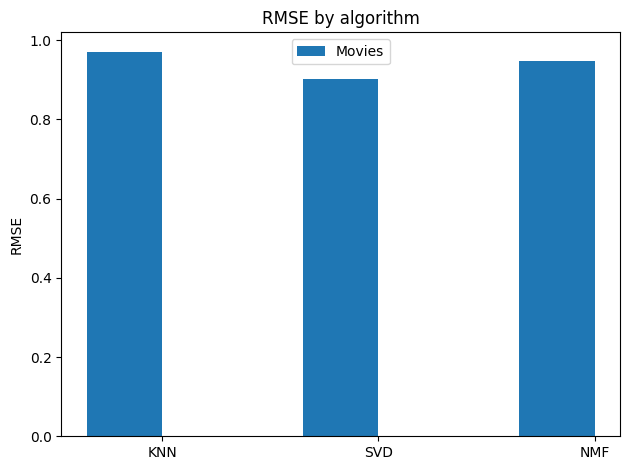

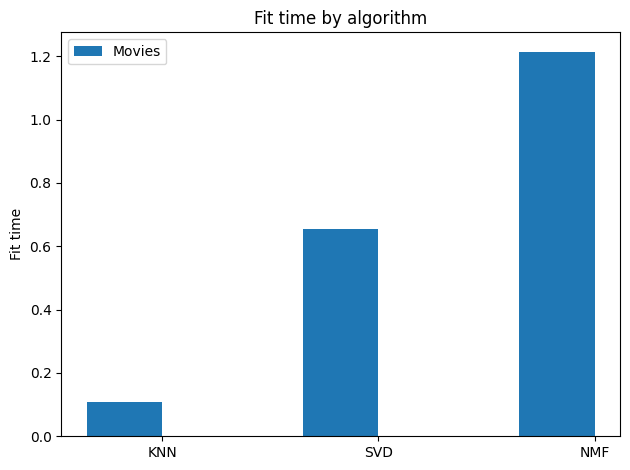

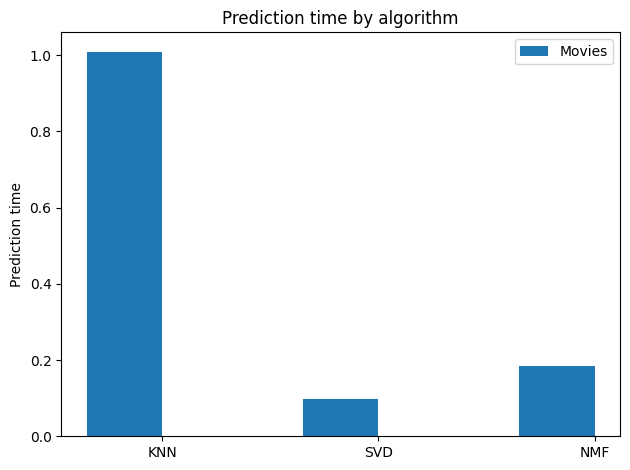

In [9]:
# Plot RSME, fit time and predict time for movies 
import matplotlib.pyplot as plt
import numpy as np

algo_names = ['KNN', 'SVD', 'NMF']
algo_movies_rsme = [algo_movies_dict['KNN']['RMSE'], algo_movies_dict['SVD']['RMSE'], algo_movies_dict['NMF']['RMSE']]
algo_movies_fit = [algo_movies_dict['KNN']['fit_time'], algo_movies_dict['SVD']['fit_time'], algo_movies_dict['NMF']['fit_time']]
algo_movies_predict = [algo_movies_dict['KNN']['predict_time'], algo_movies_dict['SVD']['predict_time'], algo_movies_dict['NMF']['predict_time']]
x = np.arange(len(algo_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_movies_rsme, width, label='Movies')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_movies_fit, width, label='Movies')
ax.set_ylabel('Fit time')
ax.set_title('Fit time by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_movies_predict, width, label='Movies')
ax.set_ylabel('Prediction time')
ax.set_title('Prediction time by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()


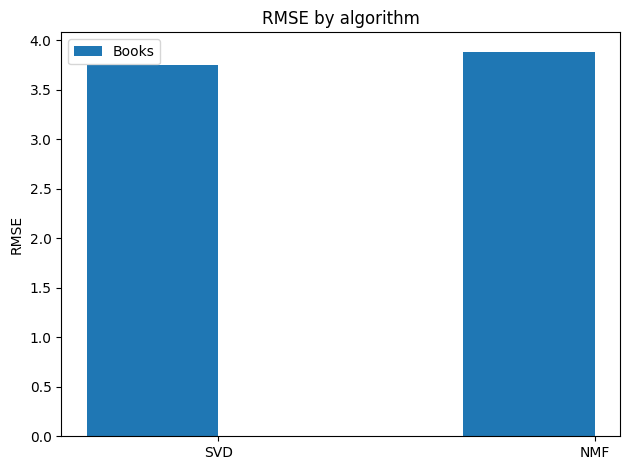

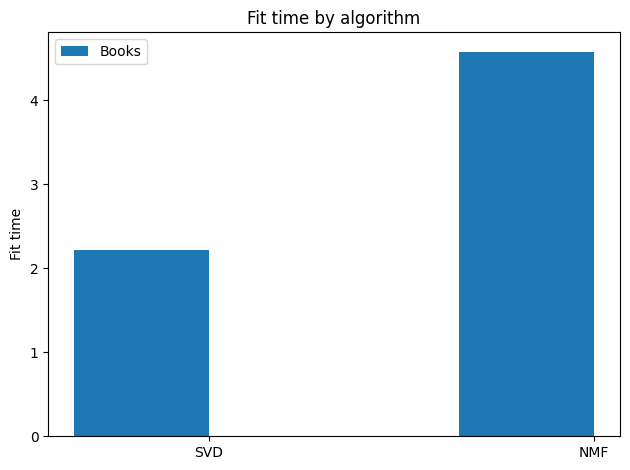

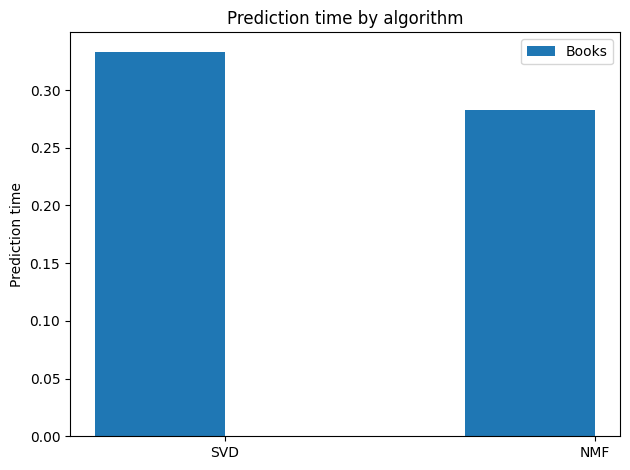

In [10]:
# Plot RSME, fit time and predict time for books
import matplotlib.pyplot as plt
import numpy as np

algo_names = ['SVD', 'NMF']
algo_books_rsme = [algo_books_dict['SVD']['RMSE'], algo_books_dict['NMF']['RMSE']]
algo_books_fit = [algo_books_dict['SVD']['fit_time'], algo_books_dict['NMF']['fit_time']]
algo_books_predict = [algo_books_dict['SVD']['predict_time'], algo_books_dict['NMF']['predict_time']]
x = np.arange(len(algo_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_books_rsme, width, label='Books')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_books_fit, width, label='Books')
ax.set_ylabel('Fit time')
ax.set_title('Fit time by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, algo_books_predict, width, label='Books')
ax.set_ylabel('Prediction time')
ax.set_title('Prediction time by algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algo_names)
ax.legend()
fig.tight_layout()
plt.show()

